# Measurements

Lets say we are interested in the harmonic oscillator.  We can use methods from the HamiltonianTerms file to build a hamiltonian, each of these routines takes as input n, the size of the matrix it produces.  This is related to the truncation of the bosonic modes. 


In [1]:
import sys
sys.path.append('..')
import src.HamiltonianTerms as ham
import numpy as np
import sympy as sp
import math
from qiskit import ClassicalRegister


dim = 8
hmat = ham.number_op(dim) + 0.5*np.identity(dim)

import sys
sys.path.append('..')
from src.MatrixToQISKITCircuit import *
from src.BinaryEncodings import *

mtoqc = MatrixToQISKITCircuit(np.asarray(hmat), 1)
mtoqc.convert(standard_encode)

3


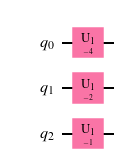

In [2]:
mtoqc.circuit.draw(output="mpl")

In [3]:
print(mtoqc.circuit.ancillas)

[]


In [4]:
from qiskit import (
    QuantumCircuit,
    execute,
    Aer)
from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ
from qiskit.visualization import plot_histogram

provider = IBMQ.load_account()

/home/chrisculver/miniconda3/envs/QuantumComputing/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [5]:
noise_backend = provider.get_backend('ibmq_16_melbourne')
noise_model = NoiseModel.from_backend(noise_backend)

In [17]:
simulator = Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(math.log(dim,2),math.log(dim,2))
print(mtoqc.circuit.qregs)
print(mtoqc.circuit.cregs)
print(circuit.qregs)
print(circuit.cregs)

circuit = circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit + mtoqc.circuit +mtoqc.circuit + mtoqc.circuit + mtoqc.circuit+mtoqc.circuit + mtoqc.circuit + mtoqc.circuit

[QuantumRegister(3, 'q')]
[]
[QuantumRegister(3, 'q')]
[ClassicalRegister(3, 'c')]


In [18]:
circuit.measure([i for i in range(round(math.log(dim,2)))], [i for i in range(round(math.log(dim,2)))])

In [19]:
job = execute(circuit, simulator, shots=1000, noise_model=noise_model)

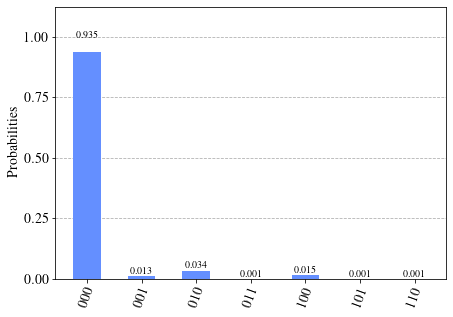

In [20]:
result=job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

In [10]:
dim = 8
adag = ham.adag(dim)

mtops = MatrixToPauliString(np.asarray(adag))
mtops.convert(standard_encode)

In [11]:
sp.expand(mtops.sum_of_paulis)

0.951733762016657*I^1*I^2*X^0 - 0.951733762016657*I*I^1*I^2*Z^0 - 0.268721060124438*I^1*X^0*Z^2 + 0.268721060124438*I*I^1*Z^0*Z^2 + 0.482962913144534*I^2*X^0*X^1 - 0.14271676764171*I^2*X^0*Z^1 - 0.482962913144534*I*I^2*X^0*Z^1 + 0.482962913144534*I*I^2*X^1*Z^0 + 0.482962913144534*I^2*Z^0*Z^1 + 0.14271676764171*I*I^2*Z^0*Z^1 + 0.25*X^0*X^1*X^2 - 0.12940952255126*X^0*X^1*Z^2 - 0.25*I*X^0*X^1*Z^2 + 0.25*I*X^0*X^2*Z^1 + 0.20970406574949*X^0*Z^1*Z^2 + 0.12940952255126*I*X^0*Z^1*Z^2 + 0.25*I*X^1*X^2*Z^0 + 0.25*X^1*Z^0*Z^2 - 0.12940952255126*I*X^1*Z^0*Z^2 - 0.25*X^2*Z^0*Z^1 - 0.12940952255126*Z^0*Z^1*Z^2 + 0.29029593425051*I*Z^0*Z^1*Z^2

In [12]:
ptoqc = PauliStringsToQISKITCircuit(mtops.sum_of_paulis)
ptoqc.string_to_terms()

In [13]:
pauli_dict={'paulis': []}
for k,v in ptoqc.pauli_terms.items():
    pauli_dict['paulis'].append({"coeff": {"real": v.real, "imag": v.imag}, "label":k})